In [ ]:
!pip install streamlit

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report

pd.set_option('display.max_columns', None) #To set no limit to the number of columns displayed

In [ ]:
data = pd.read_csv('/content/Drug_Consumption_Quantified.csv')
data = data.drop('ID', axis=1) #Extra data (not necassary) => axis = 1 to drop coloumns, for droping rows axis = 0
data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [ ]:
data.isna().sum().sum() #To check for empty data, .sum().sum() returns the total number of Not a Number (NaN) values in the entire DataFrame

0

In [ ]:
print(f'Original shape of data with {data.shape[0]} rows and {data.shape[1]} columns') #f string is used to format the string, data.shape[0] is the value of number of rows and data.shape[1] is value of number of coloumns

Original shape of data with 1884 rows and 31 columns


In [ ]:
data = data.drop(['Choc','Semer'], axis=1) #Choc (Chocolate) and Semer are fake drugs, so we are dropping them
data = data.reset_index(drop=True) #resets the index value after dropping choc and semer

In [ ]:
data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0


In [ ]:
drugs = ['Alcohol','Amyl','Amphet','Benzos','Caff','Cannabis','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','VSA'    ]


*   CL0 = No drug use
*   CL1 = Experimental or occasional use
*   CL2 = Frequent use
*   CL3 or above (CL4, CL5,CL6) = Problematic usage

In [ ]:
#Ordinal Data, so we are assigning a integer to each value, for the machine to process it well
def drug_condition(x):
    if x == 'CL0':
        return 0
    elif x == 'CL1':
        return 1
    elif x == 'CL2':
        return 2
    elif x == 'CL3':
        return 3
    elif x == 'CL4':
        return 4
    elif x == 'CL5':
        return 5
    elif x == 'CL6':
        return 6
    else:
        return 7

In [ ]:
for column in drugs:
    data[column] = data[column].apply(drug_condition)

In [ ]:
data.head()


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,0,6,4,3,0,4,0,2,0,2,3,0,4,0
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,0,0,0,6,3,0,0,0,0,0,0,0,0,1,0,0
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,3,5,2,2,0,0,0,2,0,0,0,0,2,0
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,0,6,3,0,0,1,0,0,1,0,0,2,2,0
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,2,0,0,0,6,0,0,0,0,0,0,0,0,0,0,6,0


In [ ]:
data.Education.unique()

array([ 1.98437, -0.05921,  1.16365, -1.22751, -1.7379 ,  0.45468,
       -0.61113, -2.43591, -1.43719])

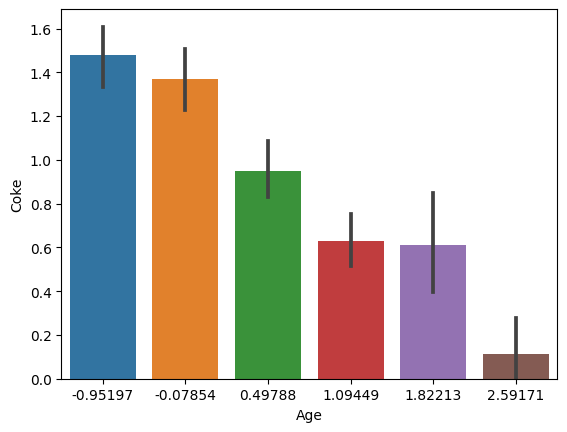

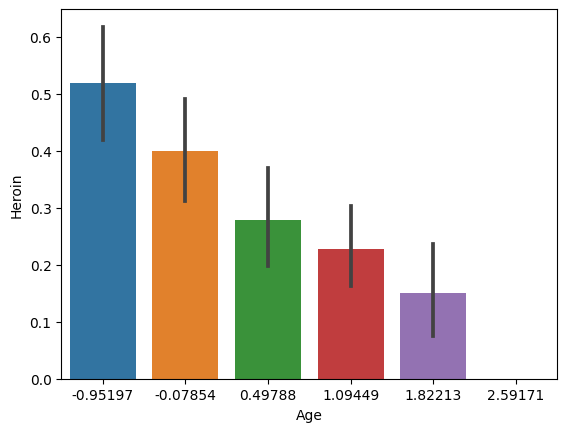

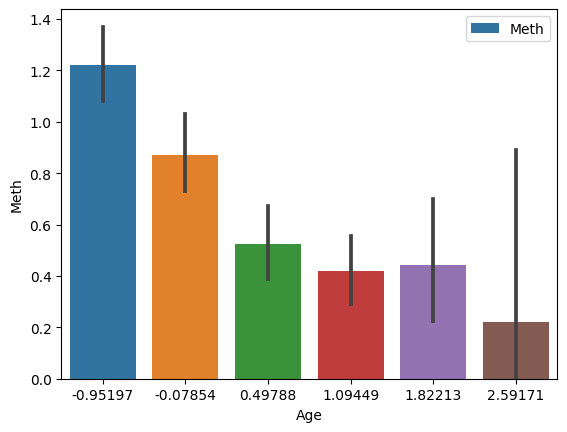

In [ ]:
sns.barplot(data=data, x='Age', y='Coke', label='Coke')
plt.show()
sns.barplot(data=data, x='Age', y='Heroin', label='Heroin')
plt.show()
sns.barplot(data=data, x='Age', y='Meth', label='Meth')
plt.legend()
plt.show()

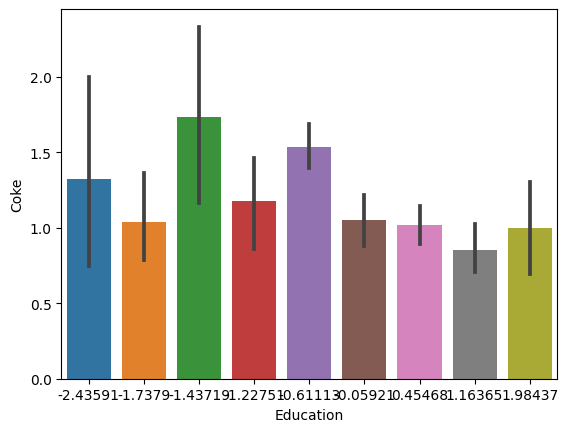

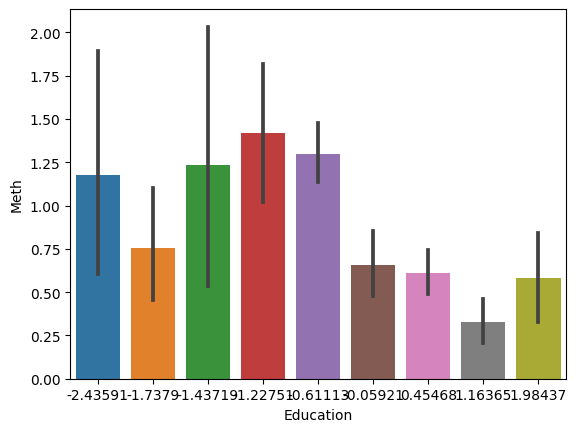

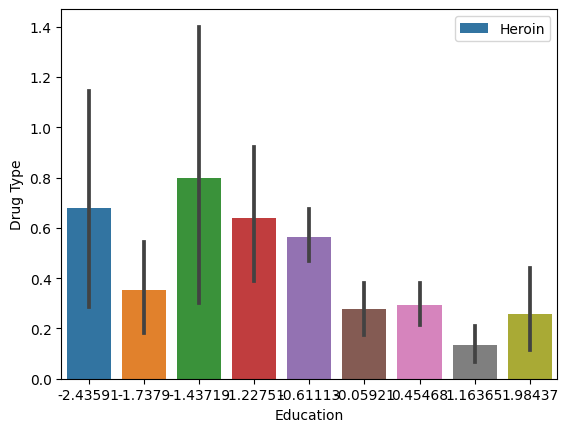

In [ ]:
sns.barplot(data=data, x='Education', y='Coke', label='Coke')
plt.show()
sns.barplot(data=data, x='Education', y='Meth', label='Meth')
plt.show()
sns.barplot(data=data, x='Education', y='Heroin', label='Heroin')
plt.ylabel('Drug Type')
plt.xlabel('Education')
plt.legend()
plt.show()

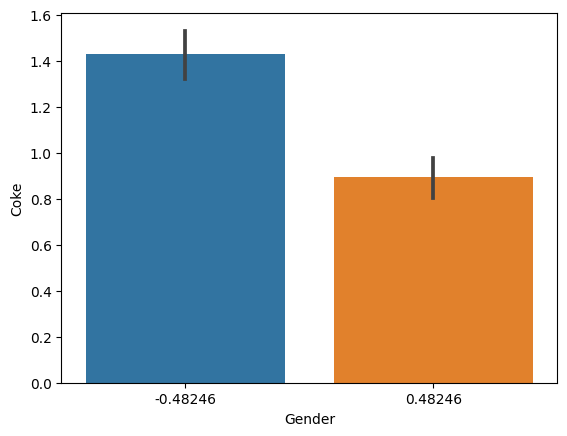

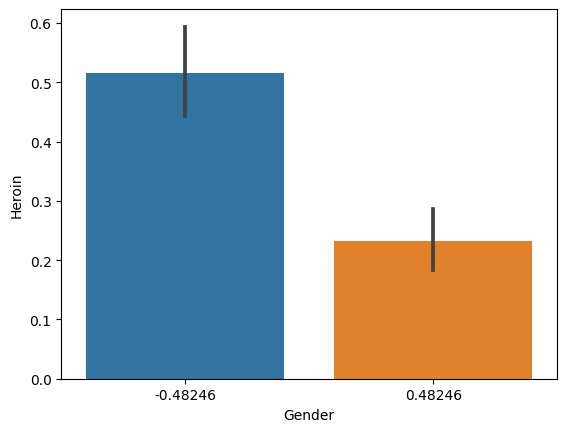

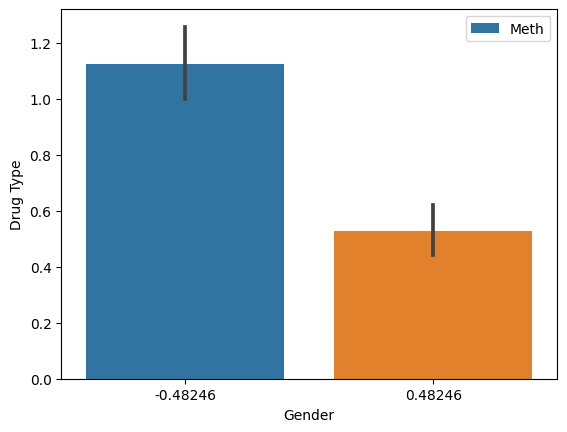

In [ ]:
sns.barplot(data=data, x='Gender', y='Coke', label='Coke')
plt.show()
sns.barplot(data=data, x='Gender', y='Heroin', label='Heroin')
plt.show()
sns.barplot(data=data, x='Gender', y='Meth', label='Meth')
plt.ylabel('Drug Type')
plt.xlabel('Gender')
plt.legend()
plt.show()

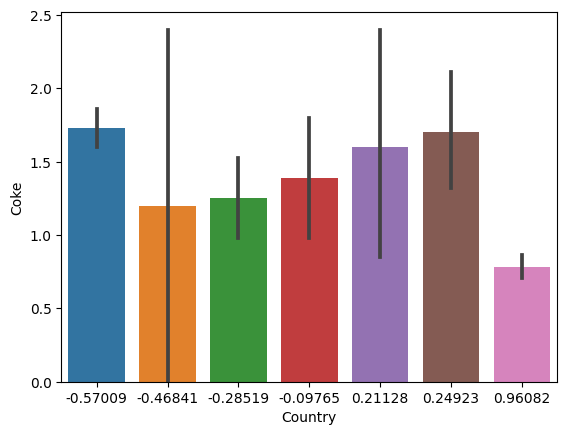

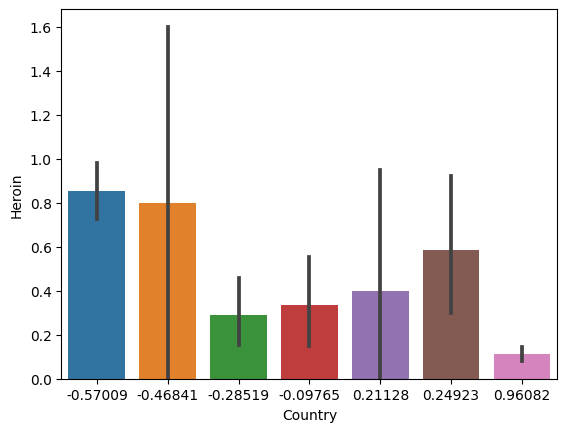

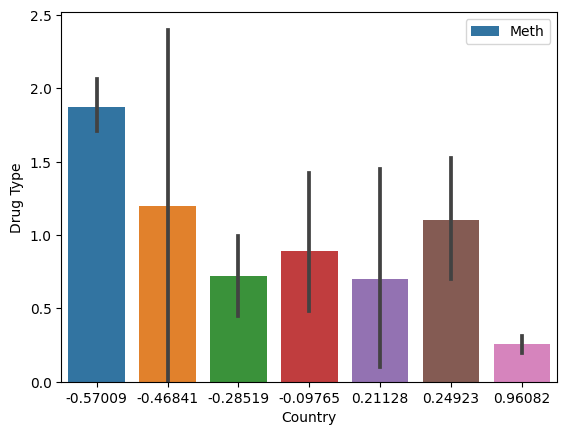

In [ ]:
sns.barplot(data=data, x='Country', y='Coke', label='Coke')
plt.show()
sns.barplot(data=data, x='Country', y='Heroin', label='Heroin')
plt.show()
sns.barplot(data=data, x='Country', y='Meth', label='Meth')
plt.ylabel('Drug Type')
plt.xlabel('Country')
plt.legend()
plt.show()

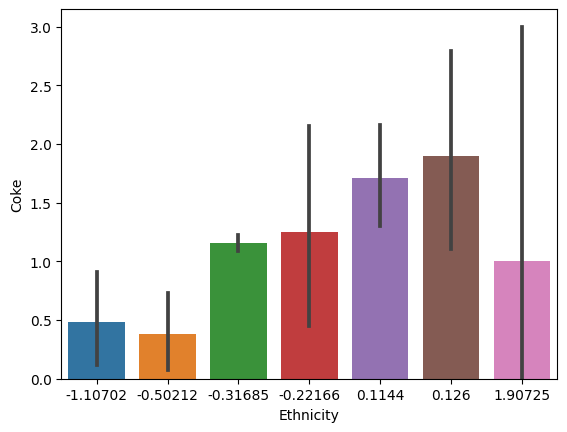

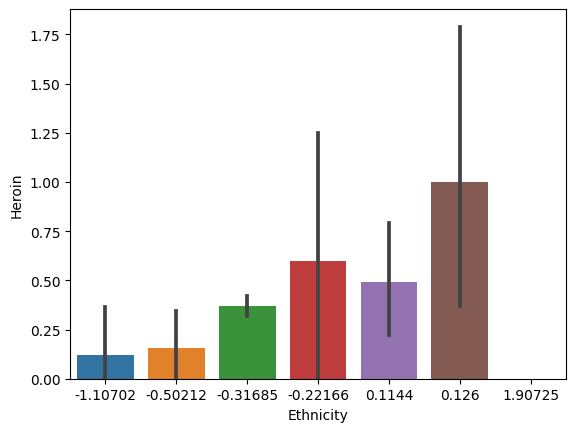

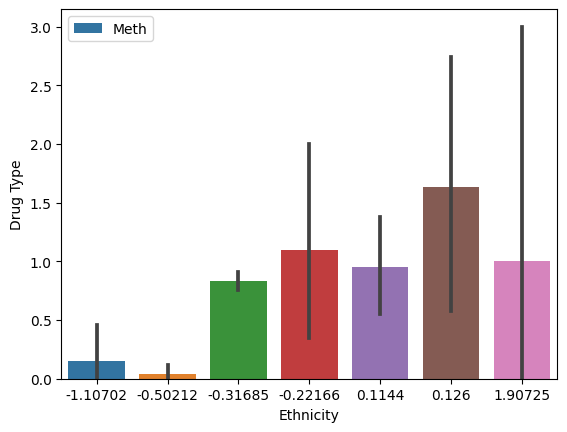

In [ ]:
sns.barplot(data=data, x='Ethnicity', y='Coke', label='Coke')
plt.show()
sns.barplot(data=data, x='Ethnicity', y='Heroin', label='Heroin')
plt.show()
sns.barplot(data=data, x='Ethnicity', y='Meth', label='Meth')
plt.ylabel('Drug Type')
plt.xlabel('Ethnicity')
plt.legend()
plt.show()

According to the graphs, Age, Gender, Education, Country and Ethinicity cannot be ignored or be droped

In [ ]:
# if 1 is shown in the column other than 0 then the individual uses the drug

cocaine_df = data.copy()
#assigning new column for cocaine+-
cocaine_df['coke_user'] = cocaine_df['Coke'].apply(lambda x: 0.5 if x not in [0,1] else 0)
cocaine_df['crack_user'] = cocaine_df['Crack'].apply(lambda x: 0.5 if x not in [0,1] else 0)
cocaine_df['both_user'] = cocaine_df[['coke_user', 'crack_user']].iloc[:].sum(axis=1)
# Cocaine = Crack + Coke
cocaine_df['Cocaine_User'] = cocaine_df['both_user'].apply(lambda x: 1 if x > 0 else 0)
#droping uneccassry column
cocaine_df = cocaine_df.drop(['coke_user', 'crack_user', 'both_user' ], axis=1)

In [ ]:
meth_df = data.copy()
#assigning new column for meth

meth_df['Meth_User'] = meth_df['Meth'].apply(lambda x: 1 if x not in [0,1] else 0)
#droping uneccassry column
meth_df = meth_df.drop(['Meth'], axis=1)

In [ ]:
heroin_df = data.copy()
#assigning new column for heroin
heroin_df['Heroin_User'] = heroin_df['Heroin'].apply(lambda x: 1 if x not in [0,1] else 0)
#droping uneccassry column
heroin_df = heroin_df.drop(['Heroin'], axis=1)

In [ ]:
nic_df = data.copy()
#assigning new column for nicotine
nic_df['Nicotine_User'] = nic_df['Nicotine'].apply(lambda x: 1 if x not in [0,1] else 0)
#droping uneccassry column
nic_df = nic_df.drop(['Nicotine'], axis=1)

In [ ]:
cocaine_df.head(1)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Cocaine_User
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,0,6,4,3,0,4,0,2,0,2,3,0,4,0,1


In [ ]:
meth_df.head(1)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Mushrooms,Nicotine,VSA,Meth_User
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,0,6,4,3,0,4,0,2,0,2,0,4,0,1


In [ ]:
heroin_df.head(1)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Coke,Crack,Ecstasy,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Heroin_User
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,0,6,4,3,0,4,2,0,2,3,0,4,0,0


In [ ]:
nic_df.head(1)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,VSA,Nicotine_User
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,0,6,4,3,0,4,0,2,0,2,3,0,0,1


In [ ]:
def preprocessing_inputs(df, column):
    df = df.copy()

    y = df[column]
    X = df.drop(column, axis=1)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns) #index = x_train.index is used to preseve the row labels and columns = X_train.columns for columns
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    return X_train, X_test, y_train, y_test

#Model Training



#Cocaine


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = preprocessing_inputs(cocaine_df, 'Cocaine_User')

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)
print()

#KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
knn_report = classification_report(y_test,y_pred)

print("---------------------Prediction with K-Nearest Neighbour---------------")
print(knn_report)

#Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

print('')
print('---------------------Prediction with Naive Bayes---------------------')
nb_report = classification_report(y_test,y_pred)
print(classification_report(y_test,y_pred))

#Logistic Regression
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)
prediction = lg_model.predict(X_test)

print('')
print('-----------------Prediction with Logistic Regression-----------------')
lg_report = classification_report(y_test,prediction)
print(lg_report)

#SVM
from sklearn.svm import SVC

svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)
prediction = svm_model.predict(X_test)

print('')
print('---------------Prediction with Support Vector Machine----------------')
svm_report = classification_report(y_test,prediction)
print(svm_report)


def extract_accuracy(report):
    lines = report.split('\n')
    for line in lines:
        if 'accuracy' in line:
            return float(line.split()[-2])

# Calculate and print accuracy for each classifier
knn_accuracy = extract_accuracy(knn_report)
nb_accuracy = extract_accuracy(nb_report)
lg_accuracy = extract_accuracy(lg_report)
svm_accuracy = extract_accuracy(svm_report)

print('')
print(f'Accuracy for K-Nearest Neighbour   : {knn_accuracy:.2f}')
print(f'Accuracy for Naive Bayes           : {nb_accuracy:.2f}')
print(f'Accuracy for Logic Regression      : {lg_accuracy:.2f}')
print(f'Accuracy for Support Vector Machine: {svm_accuracy:.2f}')

highest_int = max(knn_accuracy, nb_accuracy, lg_accuracy, svm_accuracy)

# Print the highest integer
print(f"The highest integer is: {highest_int}")


Train set: (1507, 29) (1507,)
Test set: (377, 29) (377,)

---------------------Prediction with K-Nearest Neighbour---------------
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       240
           1       0.85      0.81      0.83       137

    accuracy                           0.88       377
   macro avg       0.87      0.87      0.87       377
weighted avg       0.88      0.88      0.88       377


---------------------Prediction with Naive Bayes---------------------
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       240
           1       0.82      0.96      0.89       137

    accuracy                           0.91       377
   macro avg       0.90      0.92      0.91       377
weighted avg       0.92      0.91      0.91       377


-----------------Prediction with Logistic Regression-----------------
              precision    recall  f1-score   support

           0       

#Meth

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = preprocessing_inputs(meth_df, 'Meth_User')

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)
print()

#KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
knn_report = classification_report(y_test,y_pred)

print("---------------------Prediction with K-Nearest Neighbour---------------")
print(knn_report)

#Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

print('')
print('---------------------Prediction with Naive Bayes---------------------')
nb_report = classification_report(y_test,y_pred)
print(classification_report(y_test,y_pred))

#Logistic Regression
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)
prediction = lg_model.predict(X_test)

print('')
print('-----------------Prediction with Logistic Regression-----------------')
lg_report = classification_report(y_test,prediction)
print(lg_report)

#SVM
from sklearn.svm import SVC

svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)
prediction = svm_model.predict(X_test)

print('')
print('---------------Prediction with Support Vector Machine----------------')
svm_report = classification_report(y_test,prediction)
print(svm_report)


def extract_accuracy(report):
    lines = report.split('\n')
    for line in lines:
        if 'accuracy' in line:
            return float(line.split()[-2])

# Calculate and print accuracy for each classifier
knn_accuracy = extract_accuracy(knn_report)
nb_accuracy = extract_accuracy(nb_report)
lg_accuracy = extract_accuracy(lg_report)
svm_accuracy = extract_accuracy(svm_report)

print('')
print(f'Accuracy for K-Nearest Neighbour   : {knn_accuracy:.2f}')
print(f'Accuracy for Naive Bayes           : {nb_accuracy:.2f}')
print(f'Accuracy for Logic Regression      : {lg_accuracy:.2f}')
print(f'Accuracy for Support Vector Machine: {svm_accuracy:.2f}')

highest_int = max(knn_accuracy, nb_accuracy, lg_accuracy, svm_accuracy)

# Print the highest integer
print(f"The highest integer is: {highest_int}")


Train set: (1507, 28) (1507,)
Test set: (377, 28) (377,)

---------------------Prediction with K-Nearest Neighbour---------------
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       295
           1       0.72      0.59      0.64        82

    accuracy                           0.86       377
   macro avg       0.80      0.76      0.78       377
weighted avg       0.85      0.86      0.85       377


---------------------Prediction with Naive Bayes---------------------
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       295
           1       0.55      0.78      0.65        82

    accuracy                           0.81       377
   macro avg       0.74      0.80      0.76       377
weighted avg       0.85      0.81      0.82       377


-----------------Prediction with Logistic Regression-----------------
              precision    recall  f1-score   support

           0       

#Heroin

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = preprocessing_inputs(heroin_df, 'Heroin_User')

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)
print()

#KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
knn_report = classification_report(y_test,y_pred)

print("---------------------Prediction with K-Nearest Neighbour---------------")
print(knn_report)

#Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

print('')
print('---------------------Prediction with Naive Bayes---------------------')
nb_report = classification_report(y_test,y_pred)
print(classification_report(y_test,y_pred))

#Logistic Regression
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)
prediction = lg_model.predict(X_test)

print('')
print('-----------------Prediction with Logistic Regression-----------------')
lg_report = classification_report(y_test,prediction)
print(lg_report)

#SVM
from sklearn.svm import SVC

svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)
prediction = svm_model.predict(X_test)

print('')
print('---------------Prediction with Support Vector Machine----------------')
svm_report = classification_report(y_test,prediction)
print(svm_report)


def extract_accuracy(report):
    lines = report.split('\n')
    for line in lines:
        if 'accuracy' in line:
            return float(line.split()[-2])

# Calculate and print accuracy for each classifier
knn_accuracy = extract_accuracy(knn_report)
nb_accuracy = extract_accuracy(nb_report)
lg_accuracy = extract_accuracy(lg_report)
svm_accuracy = extract_accuracy(svm_report)

print('')
print(f'Accuracy for K-Nearest Neighbour   : {knn_accuracy:.2f}')
print(f'Accuracy for Naive Bayes           : {nb_accuracy:.2f}')
print(f'Accuracy for Logic Regression      : {lg_accuracy:.2f}')
print(f'Accuracy for Support Vector Machine: {svm_accuracy:.2f}')

highest_int = max(knn_accuracy, nb_accuracy, lg_accuracy, svm_accuracy)

# Print the highest integer
print(f"The highest integer is: {highest_int}")


Train set: (1507, 28) (1507,)
Test set: (377, 28) (377,)

---------------------Prediction with K-Nearest Neighbour---------------
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       334
           1       0.58      0.44      0.50        43

    accuracy                           0.90       377
   macro avg       0.75      0.70      0.72       377
weighted avg       0.89      0.90      0.89       377


---------------------Prediction with Naive Bayes---------------------
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       334
           1       0.40      0.91      0.56        43

    accuracy                           0.84       377
   macro avg       0.69      0.87      0.73       377
weighted avg       0.92      0.84      0.86       377


-----------------Prediction with Logistic Regression-----------------
              precision    recall  f1-score   support

           0       

#Nicotine

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = preprocessing_inputs(nic_df, 'Nicotine_User')

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)
print()

#KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
knn_report = classification_report(y_test,y_pred)

print("---------------------Prediction with K-Nearest Neighbour---------------")
print(knn_report)

#Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

print('')
print('---------------------Prediction with Naive Bayes---------------------')
nb_report = classification_report(y_test,y_pred)
print(classification_report(y_test,y_pred))

#Logistic Regression
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)
prediction = lg_model.predict(X_test)

print('')
print('-----------------Prediction with Logistic Regression-----------------')
lg_report = classification_report(y_test,prediction)
print(lg_report)

#SVM
from sklearn.svm import SVC

svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)
prediction = svm_model.predict(X_test)

print('')
print('---------------Prediction with Support Vector Machine----------------')
svm_report = classification_report(y_test,prediction)
print(svm_report)


def extract_accuracy(report):
    lines = report.split('\n')
    for line in lines:
        if 'accuracy' in line:
            return float(line.split()[-2])

# Calculate and print accuracy for each classifier
knn_accuracy = extract_accuracy(knn_report)
nb_accuracy = extract_accuracy(nb_report)
lg_accuracy = extract_accuracy(lg_report)
svm_accuracy = extract_accuracy(svm_report)

print('')
print(f'Accuracy for K-Nearest Neighbour   : {knn_accuracy:.2f}')
print(f'Accuracy for Naive Bayes           : {nb_accuracy:.2f}')
print(f'Accuracy for Logic Regression      : {lg_accuracy:.2f}')
print(f'Accuracy for Support Vector Machine: {svm_accuracy:.2f}')

highest_int = max(knn_accuracy, nb_accuracy, lg_accuracy, svm_accuracy)

# Print the highest integer
print(f"The highest integer is: {highest_int}")


Train set: (1507, 28) (1507,)
Test set: (377, 28) (377,)

---------------------Prediction with K-Nearest Neighbour---------------
              precision    recall  f1-score   support

           0       0.57      0.55      0.56       125
           1       0.78      0.80      0.79       252

    accuracy                           0.72       377
   macro avg       0.68      0.67      0.68       377
weighted avg       0.71      0.72      0.71       377


---------------------Prediction with Naive Bayes---------------------
              precision    recall  f1-score   support

           0       0.51      0.80      0.62       125
           1       0.86      0.62      0.72       252

    accuracy                           0.68       377
   macro avg       0.68      0.71      0.67       377
weighted avg       0.74      0.68      0.69       377


-----------------Prediction with Logistic Regression-----------------
              precision    recall  f1-score   support

           0       